In [1]:
def line(x, a, b):
    return a * x + b

In [4]:
a, b = 0.1, 10
X = [1, 2, 3, 4]
Y = [line(x, a, b) for x in X]

In [5]:
Y

[10.1, 10.2, 10.3, 10.4]

In [175]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X,
    y=Y,
    name="Name of Trace 1"       # this sets its legend entry
))


NameError: name 'X' is not defined

In [163]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

In [7]:
def get_reward(prob, n = 10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward +=1
    return reward

In [13]:
X = [get_reward(0.7) for _ in range(2000)]
np.mean([get_reward(0.7) for _ in range(2000)])

7.0125

In [14]:
record = np.zeros([10, 2])

In [15]:
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [16]:
def update_record(record,action,r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

In [17]:
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index

NameError: name 'get_reward' is not defined

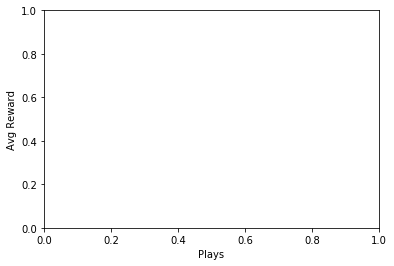

In [174]:
n = 2
fig, ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
record = np.zeros((n,2))
probs = np.random.rand(n)
eps = 0.2
rewards = [0]
for i in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(n)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

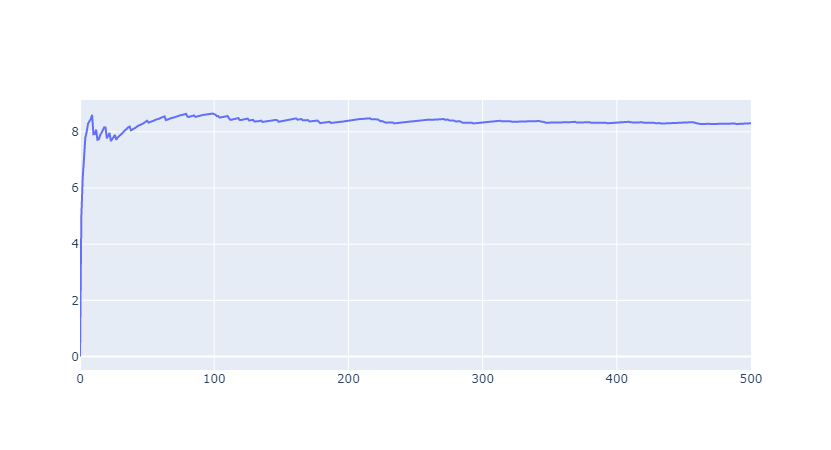

In [41]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=np.arange(len(rewards)),
    y=rewards
))
fig.show()

In [1]:
import numpy

In [2]:
numpy.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [3]:
import torch

In [4]:
torch.Tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [6]:
torch.__version__

'1.1.0'

In [7]:
numpy.__version__

'1.18.1'

In [70]:
x = torch.Tensor([2,4])
m = torch.randn(2, requires_grad=True)
b = torch.randn(1, requires_grad=True)
y = m*x+b
y_known = torch.Tensor([2,4])
loss = (torch.sum(y_known - y))**2
loss.backward()
m.grad

tensor([3.3078, 6.6156])

In [71]:
loss

tensor(0.6838, grad_fn=<PowBackward0>)

In [72]:
y = m.grad*x+b
y_known = torch.Tensor([2,4])
loss = (torch.sum(y_known - y))**2
loss.backward()
m.grad

tensor([3.3078, 6.6156])

In [73]:
loss

tensor(848.6937, grad_fn=<PowBackward0>)

In [92]:
import numpy as np
import random

class ContextBandit:
    
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()
        
    def init_distribution(self, arms):
        self.bandit_matrix = np.random.rand(arms,arms)
        
    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward
    
    def get_state(self):
        return self.state
    
    def update_state(self):
        self.state = np.random.randint(0,self.arms)
        
    def get_reward(self,arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])
    
    def choose_arm(self, arm):
        reward = self.get_reward(arm)
        self.update_state()
        return reward

In [134]:
env = ContextBandit(arms=5)

In [135]:
state = env.get_state()
reward = env.choose_arm(1)
print(f'{reward} {state}')

5 2


In [137]:
env.bandit_matrix

array([[0.28357076, 0.82431283, 0.72947034, 0.01558191, 0.22266357],
       [0.557277  , 0.15938479, 0.49471745, 0.67271865, 0.96550414],
       [0.92352768, 0.79300069, 0.90355788, 0.20555401, 0.40767678],
       [0.06268852, 0.75137187, 0.0705545 , 0.62138078, 0.05549613],
       [0.89389129, 0.87181412, 0.88908124, 0.92706657, 0.09618149]])

In [182]:
import numpy as np
import torch
arms = 10
N, D_in, H, D_out = 1, arms, 100, arms
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.ReLU(),
)
loss_fn = torch.nn.MSELoss()

def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec

def softmax(av, tau=1.12):
    softm = np.exp(av / tau) / np.sum( np.exp(av / tau) )
    return softm

def train(env, epochs=5000, learning_rate=1e-2):
    cur_state = torch.Tensor(one_hot(arms,env.get_state()))
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards = []
    for i in range(epochs):
        y_pred = model(cur_state)
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0)
        av_softmax /= av_softmax.sum()
        choice = np.random.choice(arms, p=av_softmax)
        cur_reward = env.choose_arm(choice)
        one_hot_reward = y_pred.data.numpy().copy()
        one_hot_reward[choice] = cur_reward
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward)
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cur_state = torch.Tensor(one_hot(arms,env.get_state()))
    return np.array(rewards)

In [183]:
env = ContextBandit(arms)
rewards = train(env)

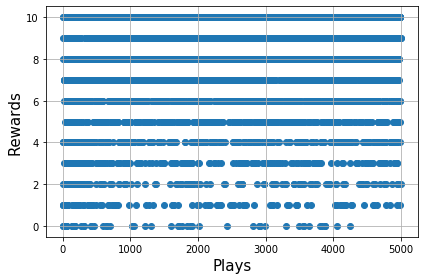

In [187]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel('Plays', fontsize=15)
ax.set_ylabel('Rewards', fontsize=15)

ax.scatter(np.arange(len(rewards)), rewards)

ax.grid(True)
fig.tight_layout()


In [7]:
def Q(state, action):
    return 0

def get_updated_q_value(old_q_value, reward, state, step_size, discount):
    term2 = reward + discount * max([Q(state, action) for action in actions])
    term2 = term2 – old_q_value
    term2 = step_size * term2
    return (old_q_value + term2)

SyntaxError: invalid character in identifier (<ipython-input-7-815627648905>, line 6)